# Module 4 Lab

## The Normal Distribution and Confidence Intervals

In [1]:
# Load necessary libraries
import pandas as pd # for data science
import numpy as np  # linear algebra library
import matplotlib.pyplot as plt # plotting library
# import stats functions
from scipy import stats
# normal continuous random variable
from scipy.stats import norm

### Recall *Z*-Normalization from Module 2 Lab
$$ Z = \frac{x-\mu}{\sigma} $$

## The Normal Distribution

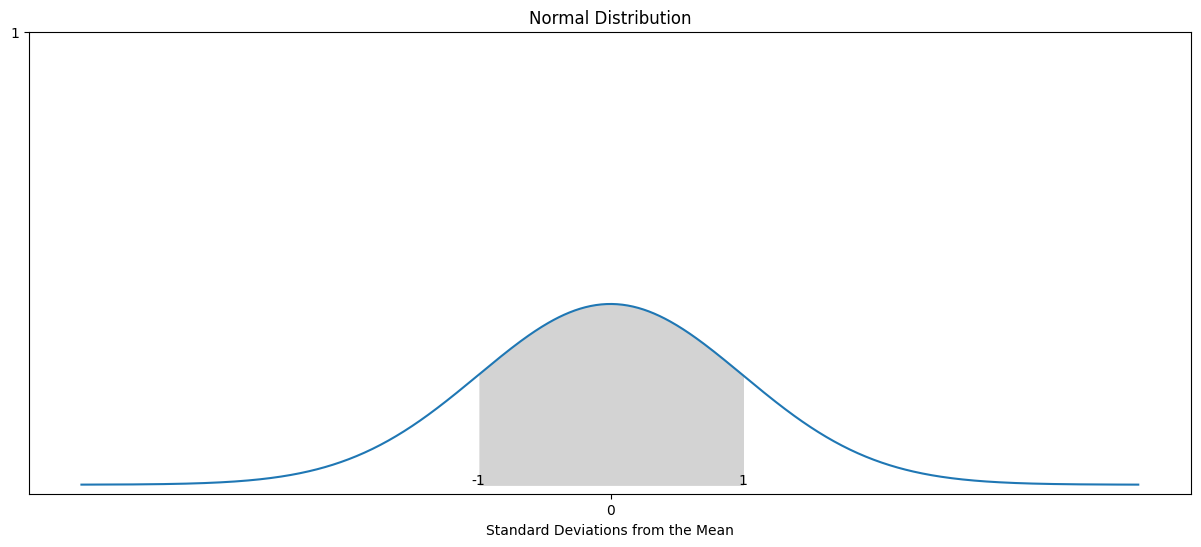

In [2]:
# Plot between -4 and 4 with .01 steps.
x_axis = np.arange(-4, 4, 0.01)

# mean centered at zero
mean = 0
std = 1 # by 1 standard deviation

# plot probability density function
pdf = stats.norm.pdf(x_axis, mean, std)
plt.figure(figsize=(15, 6)) # change figure size
plt.plot(x_axis, pdf)

z_score =  1 # z-score for 68%

# lower and upper bounds
low = mean-z_score*std
high = mean+z_score*std

# fill (shade) the lower and upper bounds with color
plt.fill_between(x_axis, pdf, where=(low < x_axis) & (x_axis < high),
                 color='lightgray')
plt.text(low, 0, low, ha='center')
plt.text(high, 0, high, ha='center')
plt.xticks([0]) # show zero mean on x-axis
plt.yticks([1]) # eliminate tick labels for y-axis
plt.title('Normal Distribution')
plt.xlabel('Standard Deviations from the Mean')

plt.show()

## Point Estimate of the Mean

For a point estimate of the mean of a population that is assumed to have a normal distribution,
a data scientist decides to use the average of the sample lower and upper quartiles for the $n = 50$
observations, since unlike the sample mean $\bar{Y}$, the quartiles are not affected by outliers. Evaluate
the precision of this estimator compared to $\bar{Y}$ by randomly generating 1,000 samples of size
50 each from a $N(0, 1)$ distribution and comparing the standard deviation of the 1,000
estimates with the theoretical standard error of $\bar{Y}$.

### Standard Error

$$ SE = \frac{\sigma}{\sqrt{n}} $$

In [ ]:
# Generate 1,000 samples of size 50, take average of lower and upper quartiles
y = []
for i in range(0,1000):
    x = norm.rvs(size=50)
    calc = (np.quantile(x, 0.75) + np.quantile(x, 0.25))/2
    y.append(calc)
# Find standard deviation of the 1,000 estimates
estimate_sd = np.std(y)
# Find the theoretical standard error
se = 1/np.sqrt(50)
print('The estimated standard deviation is {}'.format(estimate_sd))
print('The theoretical standard error is {}'.format(se))

The estimated standard deviation is 0.1564712254384888
The theoretical standard error is 0.1414213562373095


## Calculating Confidence Intervals

Sarah owns a bake shop that sells an average of 500 cookies per day across 11 kiosk locations at 5 dollars per cookie with a standard deviation of 5. Lately, her sales have been declining, so she wants to determine with a 68%, 95%, 99% confidence intervals, respectively, how many cookies are slated to sell at these 11 kiosks.

In [ ]:
mean_cookie = 500 # average daily cookie sales
n = 11 # number of kiosks
std = 5 # standard deviation
std_error = std/(np.sqrt(n))

# calculate the 68% confidence interval
lower_sixty_eight_ci = mean_cookie - 1*std_error
upper_sixty_eight_ci = mean_cookie + 1*std_error

# calculate the 95% confidence interval
lower_ninety_five_ci = mean_cookie - 1.96*std_error
upper_ninety_five_ci = mean_cookie + 1.96*std_error

# calculate the 99% confidence interval
lower_ninety_nine_ci = mean_cookie - 2.576*std_error
upper_ninety_nine_ci = mean_cookie + 2.576*std_error

print("%s [%.0f, %.0f]" % ('68% Confidence Interval: ',
                           lower_sixty_eight_ci,
                           upper_sixty_eight_ci))
print("%s [%.0f, %.0f]" % ('95% Confidence Interval: ',
                           lower_ninety_five_ci,
                           upper_ninety_five_ci))
print("%s [%.0f, %.0f]" % ('99% Confidence Interval: ',
                           lower_ninety_nine_ci,
                           upper_ninety_nine_ci))

68% Confidence Interval:  [498, 502]
95% Confidence Interval:  [497, 503]
99% Confidence Interval:  [496, 504]
